# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:

# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url.format(lat=lats[i], lon=lngs[i])
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | albany
City not found. Skipping...
Processing Record 2 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 3 of Set 1 | kayangel
City not found. Skipping...
Processing Record 4 of Set 1 | bahia de kino
Processing Record 5 of Set 1 | harda khas
Processing Record 6 of Set 1 | waitangi
City not found. Skipping...
Processing Record 7 of Set 1 | afaahiti
City not found. Skipping...
Processing Record 8 of Set 1 | mugia
City not found. Skipping...
Processing Record 9 of Set 1 | kpandu
City not found. Skipping...
Processing Record 10 of Set 1 | ust-nera
Processing Record 11 of Set 1 | mburucuya
City not found. Skipping...
Processing Record 12 of Set 1 | piti village
Processing Record 13 of Set 1 | el bauga
City not found. Skipping...
Processing Record 14 of Set 1 | tan-tan
Processing Record 15 of Set 1 | fort bragg
Processing Record 16 of Set 1 | iskateley
City not found. Skipping...
Pr

City not found. Skipping...
Processing Record 30 of Set 3 | arawa
City not found. Skipping...
Processing Record 31 of Set 3 | kodinsk
City not found. Skipping...
Processing Record 32 of Set 3 | vernon
City not found. Skipping...
Processing Record 33 of Set 3 | cabo san lucas
City not found. Skipping...
Processing Record 34 of Set 3 | khyzy
City not found. Skipping...
Processing Record 35 of Set 3 | dongola
Processing Record 36 of Set 3 | queenstown
City not found. Skipping...
Processing Record 37 of Set 3 | songjianghe
City not found. Skipping...
Processing Record 38 of Set 3 | kani keli
Processing Record 39 of Set 3 | kovdor
City not found. Skipping...
Processing Record 40 of Set 3 | mo i rana
City not found. Skipping...
Processing Record 41 of Set 3 | nahiyat ash shinafiyah
City not found. Skipping...
Processing Record 42 of Set 3 | kruisfontein
Processing Record 43 of Set 3 | nema
City not found. Skipping...
Processing Record 44 of Set 3 | jamestown
City not found. Skipping...
Proce

City not found. Skipping...
Processing Record 10 of Set 6 | murray bridge
City not found. Skipping...
Processing Record 11 of Set 6 | waingapu
City not found. Skipping...
Processing Record 12 of Set 6 | el nido
City not found. Skipping...
Processing Record 13 of Set 6 | kilindoni
City not found. Skipping...
Processing Record 14 of Set 6 | minas de marcona
City not found. Skipping...
Processing Record 15 of Set 6 | baharly
City not found. Skipping...
Processing Record 16 of Set 6 | lubang
City not found. Skipping...
Processing Record 17 of Set 6 | laojunmiao
City not found. Skipping...
Processing Record 18 of Set 6 | tangalle
City not found. Skipping...
Processing Record 19 of Set 6 | mount isa
Processing Record 20 of Set 6 | ruteng
City not found. Skipping...
Processing Record 21 of Set 6 | ishigaki
Processing Record 22 of Set 6 | ondjiva
City not found. Skipping...
Processing Record 23 of Set 6 | zaragoza
City not found. Skipping...
Processing Record 24 of Set 6 | padampur
City not fo

City not found. Skipping...
Processing Record 44 of Set 8 | geraldton
City not found. Skipping...
Processing Record 45 of Set 8 | ijebu-ife
City not found. Skipping...
Processing Record 46 of Set 8 | sterling
City not found. Skipping...
Processing Record 47 of Set 8 | san mateo del mar
City not found. Skipping...
Processing Record 48 of Set 8 | pisco
City not found. Skipping...
Processing Record 49 of Set 8 | ardabil
City not found. Skipping...
Processing Record 0 of Set 9 | brenham
City not found. Skipping...
Processing Record 1 of Set 9 | itamaraca
Processing Record 2 of Set 9 | gizo
Processing Record 3 of Set 9 | nha trang
City not found. Skipping...
Processing Record 4 of Set 9 | baruun-urt
City not found. Skipping...
Processing Record 5 of Set 9 | saratamata
Processing Record 6 of Set 9 | slave lake
City not found. Skipping...
Processing Record 7 of Set 9 | jaicos
City not found. Skipping...
Processing Record 8 of Set 9 | erenhot
City not found. Skipping...
Processing Record 9 of 

Processing Record 29 of Set 11 | kaka
City not found. Skipping...
Processing Record 30 of Set 11 | harnai
City not found. Skipping...
Processing Record 31 of Set 11 | vallenar
City not found. Skipping...
Processing Record 32 of Set 11 | nazarabad
City not found. Skipping...
Processing Record 33 of Set 11 | boende
City not found. Skipping...
Processing Record 34 of Set 11 | naberezhnyye chelny
Processing Record 35 of Set 11 | antofagasta
City not found. Skipping...
Processing Record 36 of Set 11 | tocopilla
Processing Record 37 of Set 11 | belozersk
City not found. Skipping...
Processing Record 38 of Set 11 | napanee
City not found. Skipping...
Processing Record 39 of Set 11 | samba
City not found. Skipping...
Processing Record 40 of Set 11 | ouarzazat
City not found. Skipping...
Processing Record 41 of Set 11 | coeur d'alene
City not found. Skipping...
Processing Record 42 of Set 11 | walvis bay
City not found. Skipping...
Processing Record 43 of Set 11 | chipinge
City not found. Skipp

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          179
Lat           179
Lng           179
Max Temp      179
Humidity      179
Cloudiness    179
Wind Speed    179
Country       179
Date          179
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bahia de kino,29.2134,-112.0192,308.69,22,0,4.83,MX,1686611117
1,harda khas,22.4054,76.9820,305.48,47,58,5.78,IN,1686611118
2,ust-nera,6.9119,0.0126,297.93,74,26,4.43,GH,1686611119
3,piti village,-27.7552,-58.0864,282.41,44,96,4.66,AR,1686611120
4,tan-tan,19.5419,33.3064,305.61,17,1,4.58,SD,1686611121


In [28]:
import os

# Create the output directory if it doesn't exist
output_dir = "output_data"
os.makedirs(output_dir, exist_ok=True)

# Export the City_Data into a CSV
output_file = os.path.join(output_dir, "cities.csv")
city_data_df.to_csv(output_file, index_label="City_ID")


In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bahia de kino,29.2134,-112.0192,308.69,22,0,4.83,MX,1686611117
1,harda khas,22.4054,76.9820,305.48,47,58,5.78,IN,1686611118
2,ust-nera,6.9119,0.0126,297.93,74,26,4.43,GH,1686611119
3,piti village,-27.7552,-58.0864,282.41,44,96,4.66,AR,1686611120
4,tan-tan,19.5419,33.3064,305.61,17,1,4.58,SD,1686611121


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

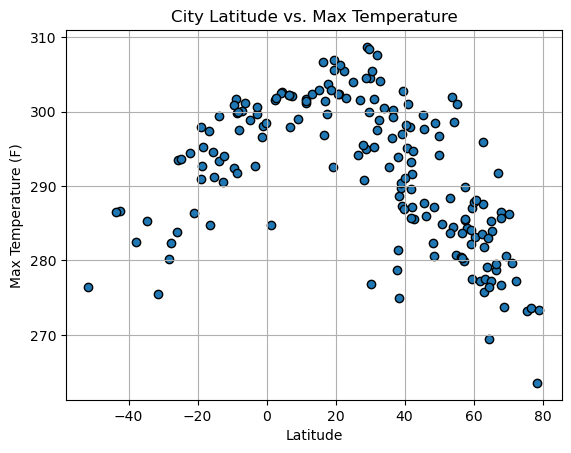

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Set title and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

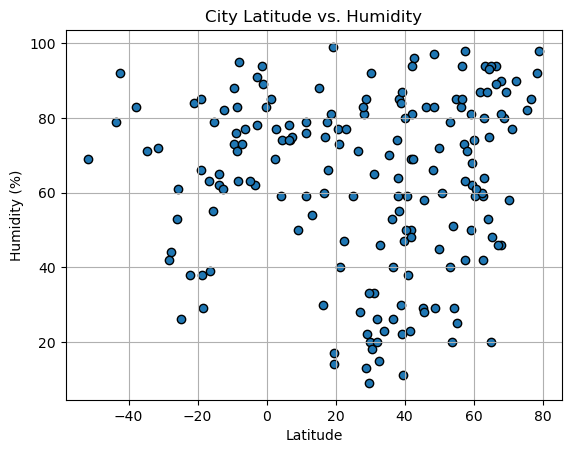

In [31]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Set title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

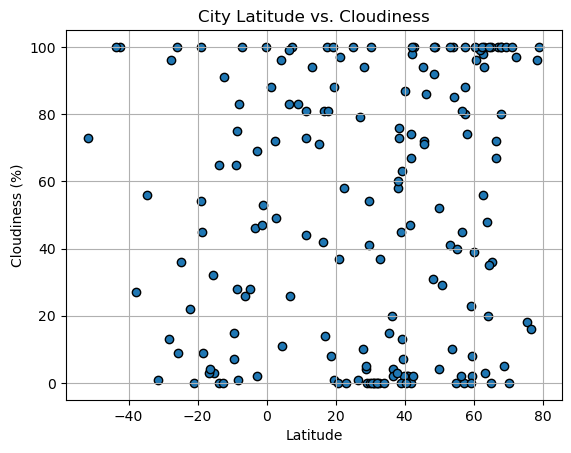

In [32]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Set title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set grid line
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

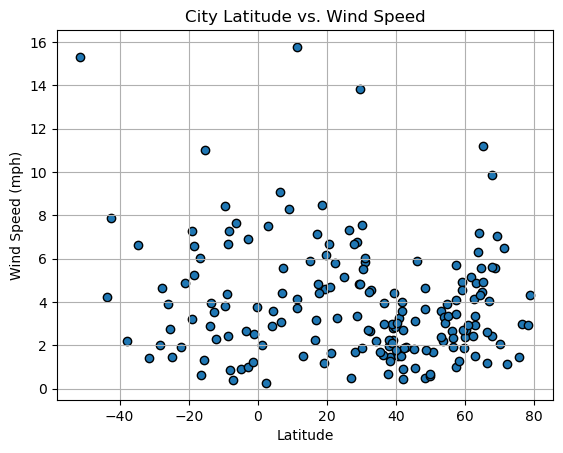

In [33]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Set title and labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set grid line
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, save_path):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors="black")
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the equation of the regression line
    equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(equation, (min(x_values), min(y_values)), fontsize=12, color="red")
    
    # Set title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Save the figure
    plt.savefig(save_path)
    
    # Show plot
    plt.show()


In [35]:
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bahia de kino,29.2134,-112.0192,308.69,22,0,4.83,MX,1686611117
1,harda khas,22.4054,76.9820,305.48,47,58,5.78,IN,1686611118
2,ust-nera,6.9119,0.0126,297.93,74,26,4.43,GH,1686611119
4,tan-tan,19.5419,33.3064,305.61,17,1,4.58,SD,1686611121
5,fort bragg,28.8891,-12.1784,294.97,85,4,6.78,MA,1686611121


In [36]:
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,piti village,-27.7552,-58.0864,282.41,44,96,4.66,AR,1686611120
9,nuuk,-25.9220,-57.0448,283.79,53,100,3.90,PY,1686611127
16,talnakh,-31.3651,-53.1401,275.52,72,1,1.40,BR,1686611133
21,sangin,-3.4291,34.2662,292.68,62,46,2.67,TZ,1686611138
25,vilyuchinsk,-6.3953,148.0790,301.10,77,26,7.64,PG,1686611144


###  Temperature vs. Latitude Linear Regression Plot

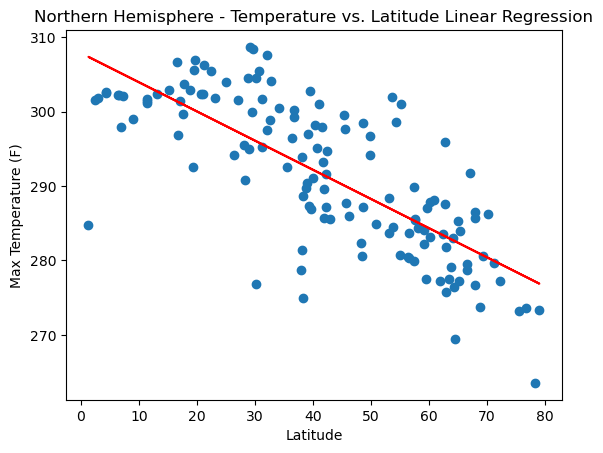

In [37]:
# Northern Hemisphere - Temperature (F) vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Add regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the equation of the line on the plot
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (0, 40), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Temperature vs. Latitude Linear Regression")

# Display plot
plt.show()


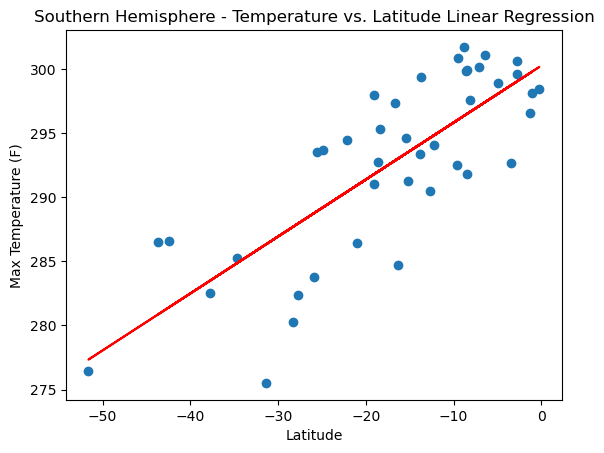

In [38]:
# Southern Hemisphere - Temperature (F) vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Add regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the equation of the line on the plot
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (-50, 80), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Temperature vs. Latitude Linear Regression")

# Display plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

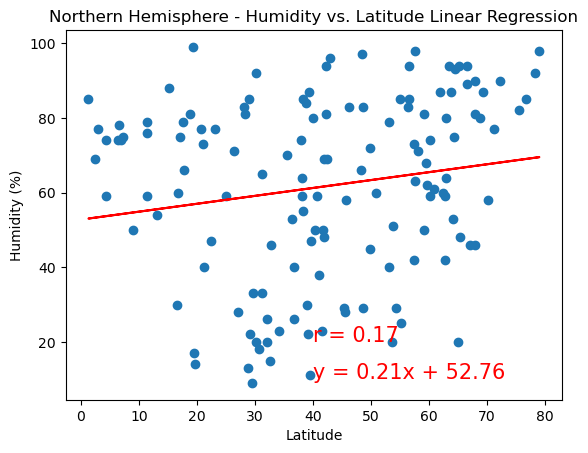

In [43]:
# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Calculate regression line values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Calculate r-value
r_squared = rvalue ** 2

# Create scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Add regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Annotate the equation of the line and r-value on the plot
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
r_value_eq = f"r = {round(rvalue, 2)}"
plt.annotate(line_eq, (40, 10), fontsize=15, color="red")
plt.annotate(r_value_eq, (40, 20), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# Display plot
plt.show()


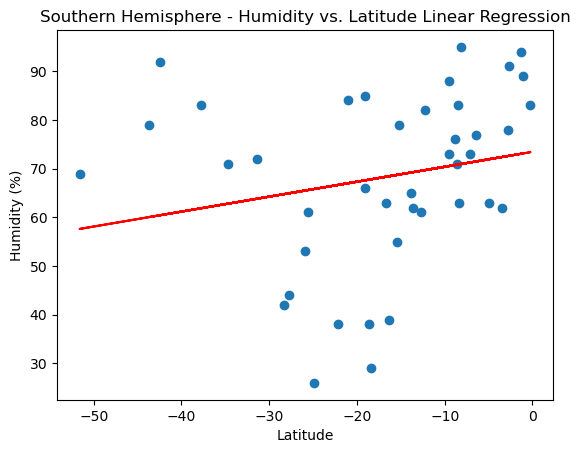

In [44]:
# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Calculate regression line values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Calculate r-value
r_squared = rvalue ** 2

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Add regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Annotate the equation of the line and r-value on the plot
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
r_value_eq = f"r = {round(rvalue, 2)}"
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")
plt.annotate(r_value_eq, (-50, 10), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# Display plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

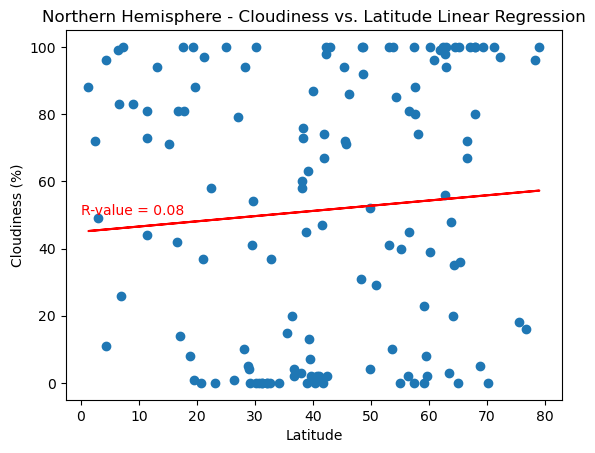

In [46]:
# Perform linear regression on Northern Hemisphere data
(north_slope, north_intercept, north_rvalue, north_pvalue, north_stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Calculate regression line values
north_regress_values = northern_hemi_df["Lat"] * north_slope + north_intercept

# Create scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Add regression line
plt.plot(northern_hemi_df["Lat"], north_regress_values, "r-")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Add R-value annotation
plt.annotate(f"R-value = {round(north_rvalue, 2)}", (0, 50), color="red")

# Display plot
plt.show()



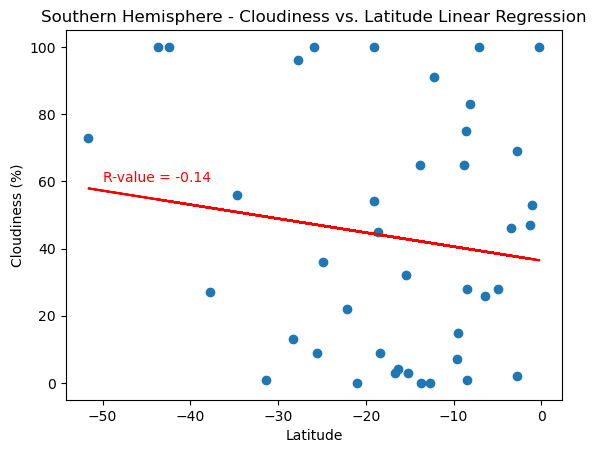

In [47]:
# Perform linear regression on Southern Hemisphere data
(south_slope, south_intercept, south_rvalue, south_pvalue, south_stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Calculate regression line values
south_regress_values = southern_hemi_df["Lat"] * south_slope + south_intercept

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Add regression line
plt.plot(southern_hemi_df["Lat"], south_regress_values, "r-")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Add R-value annotation
plt.annotate(f"R-value = {round(south_rvalue, 2)}", (-50, 60), color="red")

# Display plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

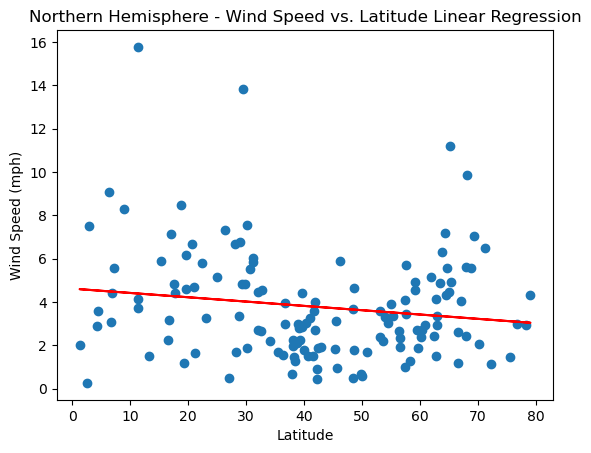

In [48]:
# Perform linear regression on Northern Hemisphere data
(north_slope, north_intercept, north_rvalue, _, _) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Calculate regression line values
north_regress_values = northern_hemi_df["Lat"] * north_slope + north_intercept

# Create scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Add regression line
plt.plot(northern_hemi_df["Lat"], north_regress_values, "r-")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Add R-value annotation
plt.annotate(f"R-value = {round(north_rvalue, 2)}", (10, 25), color="red")

# Display plot
plt.show()


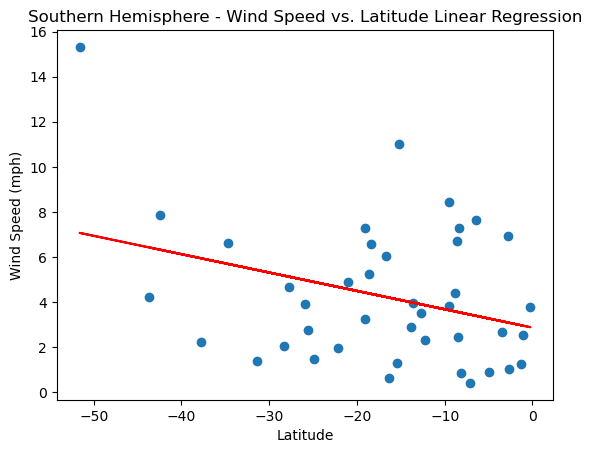

R-value: -0.3291585721411905


In [51]:
# Perform linear regression on Southern Hemisphere data
(south_slope, south_intercept, south_rvalue, _, _) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Calculate regression line values
south_regress_values = southern_hemi_df["Lat"] * south_slope + south_intercept

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Add regression line
plt.plot(southern_hemi_df["Lat"], south_regress_values, "r-")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Add R-value annotation
plt.annotate(f"R-value = {round(south_rvalue, 2)}", (-30, 25), color="red")

# Display plot
plt.show()
print("R-value:", south_rvalue)



**Discussion about the linear relationship:** YOUR RESPONSE HERE